# 2.4

In [10]:
from operator import sub
import pandas as pd
import numpy as np
import PCA_utils
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from math import sqrt
NUM_OF_DP_2_VIS = 10
NUM_OF_DP_2_VIS_ROWS = 2
NUM_OF_DP_2_VIS_COLS = 5
img_path = "img/ex4/"

In [11]:
data_csv = pd.read_csv("data_proc.csv", header=None)
data = pd.DataFrame.to_numpy(data_csv)

# raw data (data, id, sid)
data = np.delete(data, 0, 1)
data_raw = np.delete(data,np.s_[0:2],axis=1)
print(data_raw.shape)

(66000, 529)


### 1. This task is about reconstructing data using PCA. First select some images from the dataset and plot them.

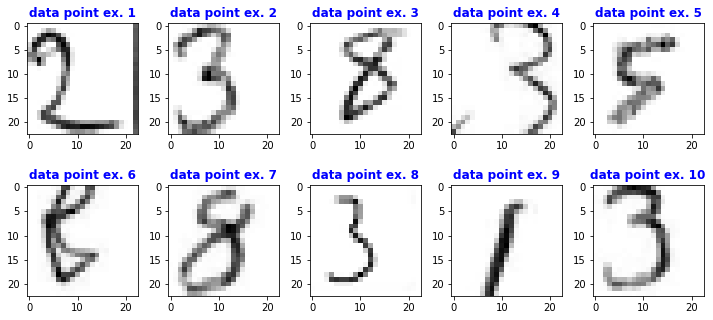

In [12]:

random_indices = np.random.choice(data.shape[0], size=NUM_OF_DP_2_VIS, replace=False)
random_images = data_raw[random_indices, :]

sub_titles = []
for i in range(1, NUM_OF_DP_2_VIS + 2):
    sub_titles.append("data point ex. " + str(i))

# PCA_utils.visualize_images(random_images, NUM_OF_DP_2_VIS_ROWS, NUM_OF_DP_2_VIS_COLS, "Original data"
PCA_utils.visualize_generic(random_images, NUM_OF_DP_2_VIS_ROWS, NUM_OF_DP_2_VIS_COLS, "", sub_titles , img_path + "dp_9_ex.png")


### 2. Plot the first 10 eigenvectors/loadingvectors as images. Can you describe what you see?

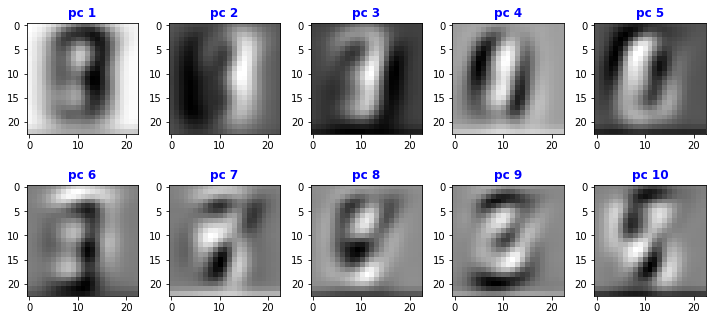

In [13]:
pca_decomp = PCA()
pca_decomp.fit(data_raw)

pcas = pca_decomp.components_[:NUM_OF_DP_2_VIS, :]
sub_titles = []
for i in range(1, NUM_OF_DP_2_VIS + 1):
    sub_titles.append("pc " + str(i))

# print 10 pcas
PCA_utils.visualize_generic(pcas, NUM_OF_DP_2_VIS_ROWS,NUM_OF_DP_2_VIS_COLS, "", sub_titles, img_path + "pcas10.png")


### 3. Plot a reconstruction of the images you displayed in 2.4.1 using all PC’s. This can be done by multiplying the loadings with the scores and adding the removed centering.

(10, 37) (37, 529)


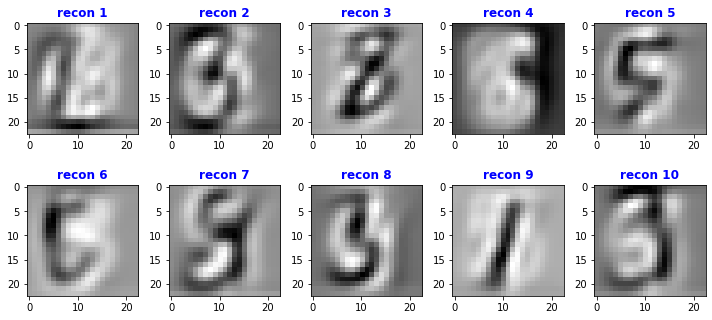

In [14]:

# source: https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com
# loadings = the elements of eigen vectors
# scores = data * PCA

pca_70 = PCA(n_components=0.7, svd_solver='full')

pca_70.fit(data_raw)

scores_70 = pca_70.transform(random_images)

loadings_70 = pca_70.components_

print(scores_70.shape, loadings_70.shape)

sub_titles = []
for i in range(1, NUM_OF_DP_2_VIS + 1):
    sub_titles.append("score " + str(i))

recon = np.dot(loadings_70.T,scores_70.T).T

sub_titles = []
for i in range(1, NUM_OF_DP_2_VIS + 1):
    sub_titles.append("recon " + str(i))

PCA_utils.visualize_generic(recon[:NUM_OF_DP_2_VIS], NUM_OF_DP_2_VIS_ROWS,NUM_OF_DP_2_VIS_COLS, "", sub_titles, img_path + "recon.png")


### 4. Now re-recreate using 80 % of variance, 90 % and 95 % . Can you describe what you see? How much have you reduced the data size?

In [15]:
pca_80 = PCA(n_components=0.8)
pca_90 = PCA(n_components=0.9)
pca_95 = PCA(n_components=0.95)

pca_80.fit(data_raw)
pca_90.fit(data_raw)
pca_95.fit(data_raw)

PCA(n_components=0.95)

(10, 59) (59, 529)


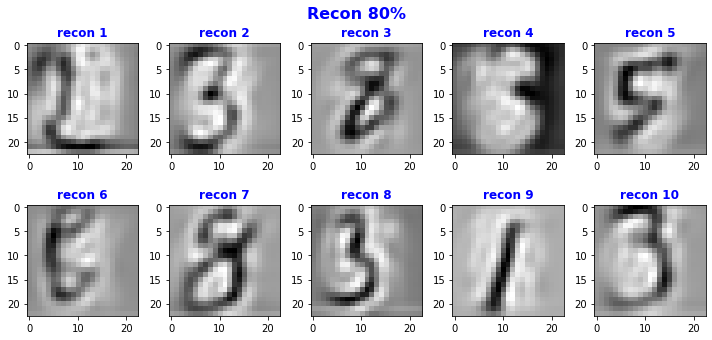

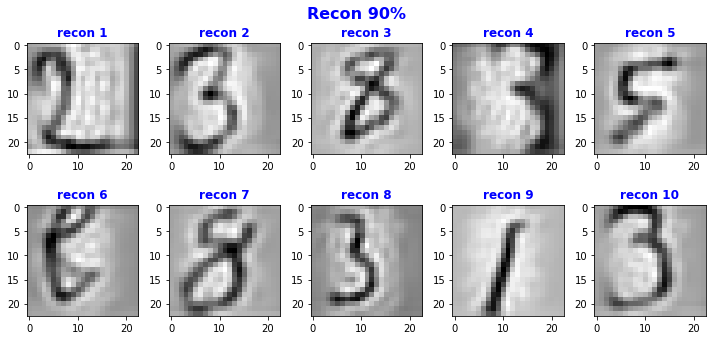

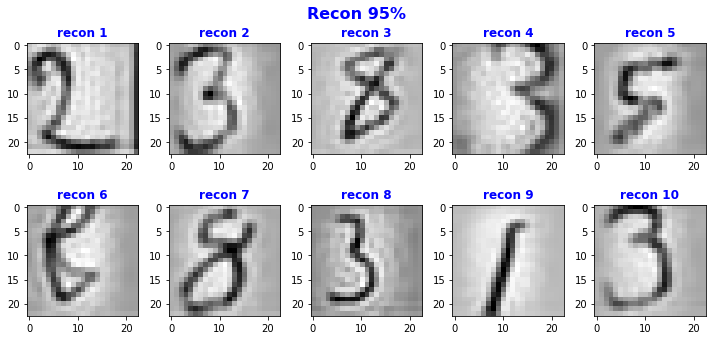

In [16]:
scores_80 = pca_80.transform(random_images)
scores_90 = pca_90.transform(random_images)
scores_95 = pca_95.transform(random_images)

loadings_80 = pca_80.components_
loadings_90 = pca_90.components_
loadings_95 = pca_95.components_

print(scores_80.shape, loadings_80.shape)

recon_80 = np.dot(loadings_80.T, scores_80.T).T
recon_90 = np.dot(loadings_90.T, scores_90.T).T
recon_95 = np.dot(loadings_95.T, scores_95.T).T

sub_titles = []
for i in range(1, NUM_OF_DP_2_VIS + 1):
    sub_titles.append("recon " + str(i))

PCA_utils.visualize_generic(recon_80[:NUM_OF_DP_2_VIS], NUM_OF_DP_2_VIS_ROWS,
                            NUM_OF_DP_2_VIS_COLS, "Recon 80%", sub_titles, img_path + "recon_80.png")
PCA_utils.visualize_generic(recon_90[:NUM_OF_DP_2_VIS], NUM_OF_DP_2_VIS_ROWS,
                            NUM_OF_DP_2_VIS_COLS, "Recon 90%", sub_titles, img_path + "recon_90.png")
PCA_utils.visualize_generic(recon_95[:NUM_OF_DP_2_VIS], NUM_OF_DP_2_VIS_ROWS,
                            NUM_OF_DP_2_VIS_COLS, "Recon 95%", sub_titles, img_path + "recon_95.png")


### 5. The last exercise is to compare the outcomes between two different ciphers. For instance, two different ciphers, (e.g. datapoints that represent a ’0’ and a ’1’), compare the 10 first scores and see if you can spot a difference. Try also to calculate the mean for all instances of these ciphers and compare the first 10 scores. Can you spot a pattern when comparing with the loadings.

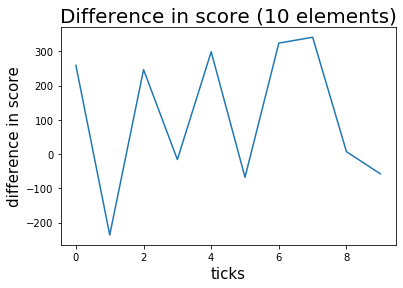

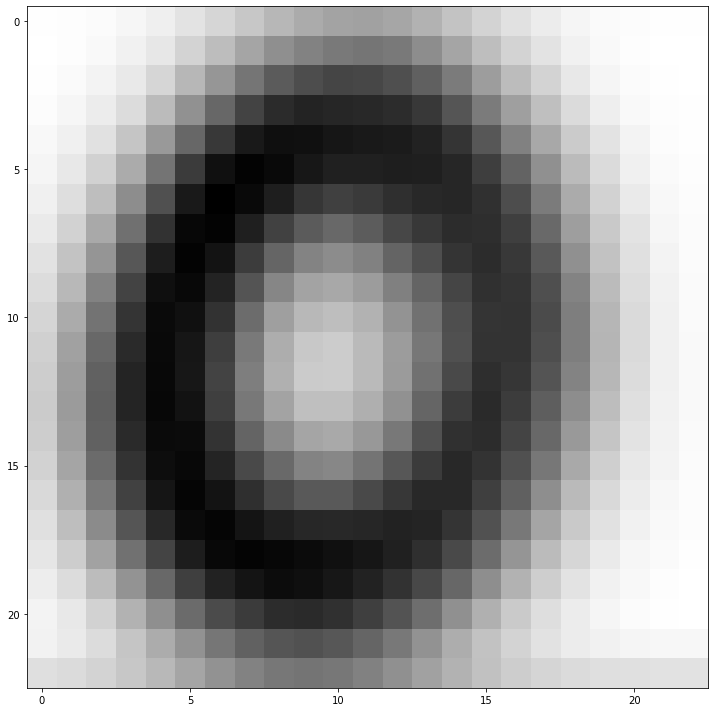

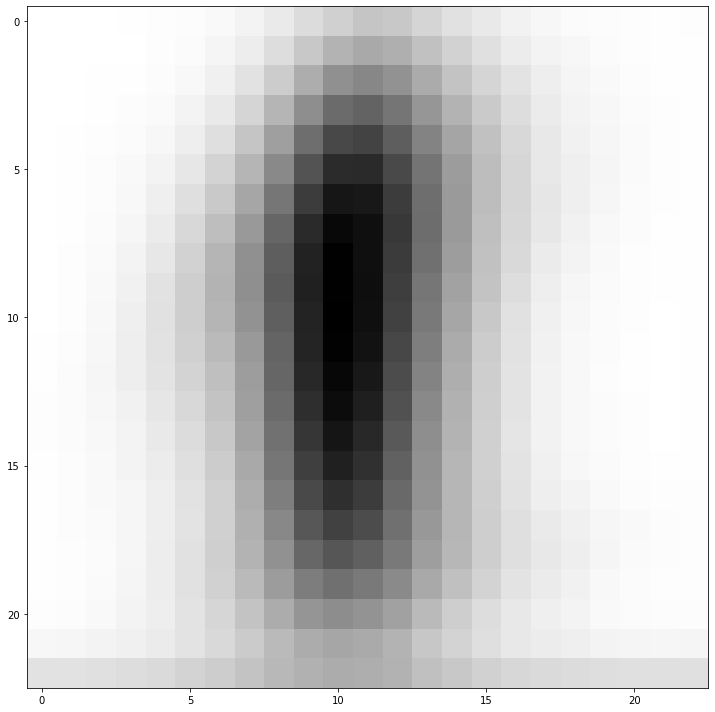

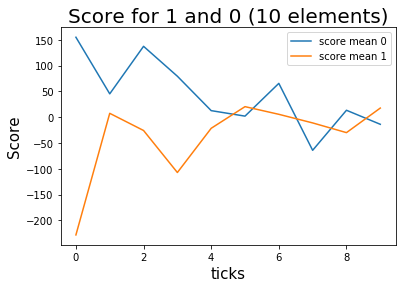

In [20]:
# ciphers chosen 0 and 1

# source: https://stackoverflow.com/questions/38910258/python-numpy-filter-two-dimensional-array-by-condition

data_cipher_0 = np.delete( data[np.in1d(data[:, 1], np.asarray([0]))], np.s_[0:2],axis=1 ) # raw data from cipher 0
data_cipher_1 = np.delete( data[np.in1d(data[:, 1], np.asarray([1]))], np.s_[0:2],axis=1 ) # raw data from cipher 1

data_cipher_0_one = np.delete( data[np.in1d(data[:, 1], np.asarray([0]))], np.s_[0:2],axis=1 )[0] # one instance
data_cipher_1_one = np.delete( data[np.in1d(data[:, 1], np.asarray([1]))], np.s_[0:2],axis=1 )[0] # one instance

data_lim = data_cipher_0[0] if data_cipher_0.shape[0] < data_cipher_1.shape[0] else data_cipher_1.shape[0]

# ensure equal lengths
data_cipher_0 = data_cipher_0[:data_lim]
data_cipher_1 = data_cipher_1[:data_lim]


SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIG_SIZE = 20

# a) compare the 10 first scores and see if you can spot a difference
score_0_one = pca_decomp.transform(data_cipher_0)[0][:10]
score_1_one = pca_decomp.transform(data_cipher_1)[0][:10]
d_score_one = score_0_one - score_1_one

plt.plot(d_score_one)
plt.title("Difference in score (10 elements)",fontsize=BIG_SIZE)
plt.xlabel("ticks", fontsize=MEDIUM_SIZE)
plt.ylabel("difference in score", fontsize=MEDIUM_SIZE)
plt.savefig(img_path + "diff_score.png")



# b) Try also to calculate the mean (score?) for all instances of these ciphers
mean_0 = np.mean(data_cipher_0,axis=0)
mean_1 = np.mean(data_cipher_1,axis=0)
means = np.array([mean_0,mean_1])

PCA_utils.visualize_generic(mean_0, 1,1, "", sub_titles, img_path + "mean0.pdf")
PCA_utils.visualize_generic(mean_1, 1,1, "", sub_titles, img_path + "mean1.pdf")

score_mean = pca_decomp.transform(means)


# # c) and compare the first 10 scores
plt.plot(score_mean[0][:10])
plt.plot(score_mean[1][:10])
plt.title("Score for 1 and 0 (10 elements)",fontsize=BIG_SIZE)
plt.xlabel("ticks",fontsize=MEDIUM_SIZE)
plt.ylabel("Score",fontsize=MEDIUM_SIZE)
plt.legend(["score mean 0", "score mean 1"],fontsize=SMALL_SIZE)
plt.savefig(img_path + "score0_score1.pdf")

# d) can you spot a pattern when comparing with the loadings



# We can here see the graphs waving in a similar pattern
